### Actividad de perceptrón y perceptrón multicapa - Álvaro Ramiro y Adriana González
#### Autor: Francisco Serradilla

Tareas:

- Escribir el código de propagación y actualización de pesos del perceptrón.
- Escribir el código de propagación y actualización de pesos del perceptrón multicapa para una capa oculta.
- Probar el correcto funcionamiento con OR y con XOR.
- Probar el correcto funcionamiento para las distribuciones generadas en el notebook. Dibujar los resultados.

Opcional:
- Problema de clasificación de orquídeas.
- Ampliar el código del perceptrón Multicapa para calcular el error de test usando otro conjunto de datos. Este error de test se irá mostrando a la vez que el error de entrenamiento mientras la red se entrena.
- Probar entrenamiento y cálculo del error de test con el juego de datos de aprobados.
- (hacer al menos dos) Probar con problemas adicionales (circulo, fun, morosos, quinielas). Al final hay una explicación de los conjuntos de datos suministrados.
- (opcional) Añadir una segunda capa oculta al perceptrón multacapa y/o un múmero indefinido de capas.

In [2]:
import numpy as np

class Perceptron:
    def __init__(self, ninput, noutput):
        self.ninput = ninput # número de entradas
        self.noutput = noutput # número de salidas
        self.w = np.random.rand(ninput,noutput)-0.5 # pesos
        self.b = np.random.rand(noutput)-0.5 # bias
        
    def forward (self, x): # propaga un vector x y devuelve la salida
        neta = x @ self.w + self.b  # Calculo neta
        s = np.array(list(map(lambda x: 1 if x > 0 else 0, neta.tolist())))  # Aplico la función de activación de escalón
        return s
        
    def update (self, x, d, alpha): # realiza una iteración de entrenamiento
        s = self.forward(x) # propaga
        error = d - s
        error = error.reshape(1, -1)
        variacion_pesos = alpha * (x.reshape(1,-1).T @ error)
        self.w += variacion_pesos  # calcula actualización de pesos para una entrada x
       
    def RMS (self, X, D): # calcula el error RMS
        S = np.array([self.forward(x) for x in X])
        return np.mean(np.sqrt(np.mean(np.square(S-D),axis=1)))
        
    def accuracy (self, X, D): # calcula el ratio de aciertos
        S = np.array([self.forward(x) for x in X])
        errors = np.mean(np.abs(D-S))
        return 1.0 - errors
    
    def info (self, X, D): # traza de cómo va el entrenamiento
        print('     RMS: %6.5f' % self.RMS(X,D))
        print('Accuracy: %6.5f' % self.accuracy(X,D))
        
    def train (self, X, D, alpha, epochs, trace=0): # entrena usando update
        for e in range(1,epochs+1): # para cada epoch
            for i in range(len(X)): # para cada ejemplo
                self.update(X[i],D[i], alpha)
            if trace!=0 and e%trace == 0: # imprime trazas
                print('\n   Epoch: %d' % e)
                self.info(X,D)

In [3]:
# entrena para la OR
p = Perceptron(2,1)

# or
data = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
labels = np.array([[0.0], [1.0], [1.0], [1.0]])

p.info(data, labels)
p.train(data, labels, 0.01, 100, 10)

     RMS: 0.25000
Accuracy: 0.75000

   Epoch: 10
     RMS: 0.25000
Accuracy: 0.75000

   Epoch: 20
     RMS: 0.25000
Accuracy: 0.75000

   Epoch: 30
     RMS: 0.25000
Accuracy: 0.75000

   Epoch: 40
     RMS: 0.25000
Accuracy: 0.75000

   Epoch: 50
     RMS: 0.25000
Accuracy: 0.75000

   Epoch: 60
     RMS: 0.25000
Accuracy: 0.75000

   Epoch: 70
     RMS: 0.25000
Accuracy: 0.75000

   Epoch: 80
     RMS: 0.25000
Accuracy: 0.75000

   Epoch: 90
     RMS: 0.25000
Accuracy: 0.75000

   Epoch: 100
     RMS: 0.25000
Accuracy: 0.75000


In [1]:
import numpy as np

class Multilayer:
    def __init__(self, ninput, nhidden, noutput):
        '''
        ninput: número de neuronas de entrada
        nhidden: número de neuronas ocultas
        noutput: número de neuronas de salida
        '''
        self.ninput = ninput # número de entradas
        self.nhidden = nhidden # número de neuronas en capa oculta
        self.noutput = noutput # número de salidas

        # pesos y bías de la capa 1
        self.w1 = np.random.rand(ninput,nhidden)-0.5
        self.b1 = np.random.rand(nhidden)-0.5
        # pesos y bías de la capa 2
        self.w2 = np.random.rand(nhidden,noutput)-0.5
        self.b2 = np.random.rand(noutput)-0.5
        
        self.lRMS = [] # contiene la lista de RMSs para pintarlos luego
        self.laccuracy = [] # contiene la lista de accuracy para pintar luego

    def sigm(self, neta): # función sigmoidal
        return 1.0 / (1.0 + np.exp(-neta))
    
    def forward (self, x): # propaga un vector x y devuelve la salida
        s1 = self.sigm(x @ self.w1 + self.b1)  # Calculo s1
        s2 = self.sigm(s1 @ self.w2 + self.b2)  # Calculo s1 
        return s2
    
    def update (self, x, d, alpha): # realiza una iteración de entrenamiento
        s1 = self.sigm(x @ self.w1 + self.b1)  # Calculo s1
        s2 = self.sigm(s1 @ self.w2 + self.b2) # Calculo s2

        delta2 = (d - s2) * s2 * (1 - s2)

        V1 = delta2.reshape(1,-1) @ self.w2.T
        delta1 = V1 * s1 * ([1] - s1)

        AW1 = alpha * (x.reshape(1,-1).T @ delta1.reshape(1,-1))
        AW1 = AW1.reshape(self.w1.shape)
        AW2 = alpha * (s1.reshape(1,-1).T @ delta2.reshape(1,-1))
        AW2 = AW2.reshape(self.w2.shape)

        Ab1 = alpha * delta1.reshape(1,-1)
        Ab1 = Ab1.reshape(self.b1.shape)
        Ab2 = alpha * delta2.reshape(1,-1)
        Ab2 = Ab2.reshape(self.b2.shape)

        self.w1 += AW1
        self.w2 += AW2
        self.b1 += Ab1
        self.b2 += Ab2

    def RMS (self, X, D): # error RMS
        S = np.array([self.forward(x) for x in X])
        return np.mean(np.sqrt(np.mean(np.square(S-D),axis=1)))
        
    def accuracy (self, X, D): # calcula ratio de aciertos
        S = np.array([self.forward(x) for x in X])
        S = np.round(S)
        errors = np.mean(np.abs(D-S))
        return 1.0 - errors
    
    def info (self, X, D): # escribe traza
        self.lRMS.append(self.RMS(X,D))
        self.laccuracy.append(self.accuracy(X,D))
        print('     RMS: %6.5f' % self.lRMS[-1])
        print('Accuracy: %6.5f' % self.laccuracy[-1])
        
    def train (self, X, D, alpha, epochs, trace=0): # entrena usando update
        self.lRMS = [] # guarda lista de RMSs para pintarlos
        self.laccuracy = [] # guarda lista de accuracy

        for e in range(1,epochs+1): # para cada epoch
            for i in range(len(X)): # para cada ejemplo
                self.update(X[i],D[i], alpha)
            if trace!=0 and e%trace == 0: # escribe traza si corresponde
                print('\n   Epoch: %d' % e)
                self.info(X,D)
                
def one_hot (d): # codificación one_hot
    num_classes = len(set(d))
    rows = d.shape[0]
    labels = np.zeros((rows, num_classes), dtype='float32')
    labels[np.arange(rows),d.T] = 1
    return labels

In [58]:
# xor
data = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
labels = np.array([[0.0], [1.0], [1.0], [0.0]])

p = Multilayer(2,3,1)
p.info(data, labels)

     RMS: 0.50027
Accuracy: 0.50000


In [61]:
p.train(data, labels, 10, 100, 20)


   Epoch: 20
     RMS: 0.34531
Accuracy: 0.75000

   Epoch: 40
     RMS: 0.34112
Accuracy: 0.75000

   Epoch: 60
     RMS: 0.27424
Accuracy: 0.75000

   Epoch: 80
     RMS: 0.05653
Accuracy: 1.00000

   Epoch: 100
     RMS: 0.04419
Accuracy: 1.00000


In [62]:
p.forward(np.array([0,0]))

array([0.02706582])

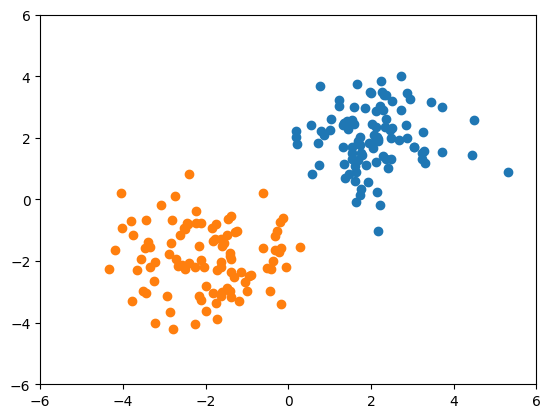

In [63]:
import numpy as np

# example data from two classes; 2D normal distributions
num = 100
x0 = np.random.multivariate_normal([2,2], np.array([[1,0],[0,1]]),num)
d0 = np.repeat(0, num)
x1 = np.random.multivariate_normal([-2,-2], np.array([[1,0],[0,1]]),num)
d1 = np.repeat(1, num)

import matplotlib.pyplot as plt
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.plot(x0[:,0],x0[:,1],'o')
plt.plot(x1[:,0],x1[:,1],'o')

plt.show()

X = np.vstack((x0,x1))
d = np.hstack((d0,d1))
d.shape = (200,1) # convierte el vector en un array

In [69]:
# entrenar
p = Perceptron(2,1)
p.train(X, d, 0.01, 10, 5)


   Epoch: 5
     RMS: 0.00000
Accuracy: 1.00000

   Epoch: 10
     RMS: 0.00000
Accuracy: 1.00000


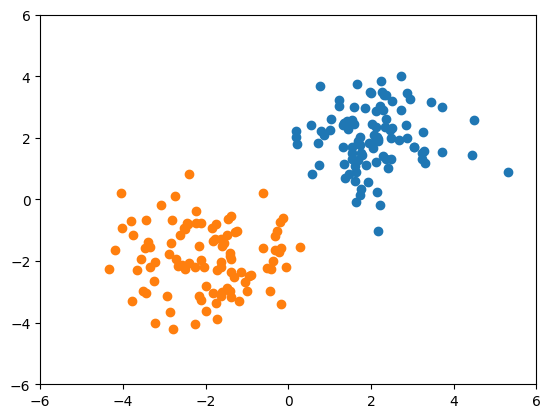

In [70]:
# Dibujar el resultado de la clasificación por el perceptrón

preds = list(zip(X.tolist(), [p.forward(x).tolist()[0] for x in X]))
pred0 = np.array([point for point, pred in preds if pred == 0])
pred1 = np.array([point for point, pred in preds if pred == 1])
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.plot(pred0[:,0],pred0[:,1],'o')
plt.plot(pred1[:,0],pred1[:,1],'o')

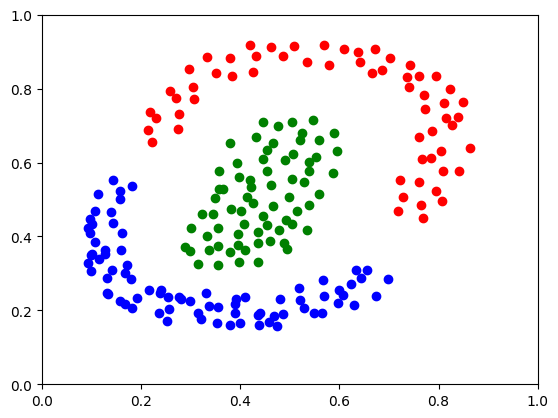

In [55]:
# regiones no lineales

X = np.loadtxt('samples/data_3classes_nonlinear_2D.txt')

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.plot(X[d==2,0],X[d==2,1], 'bo')
plt.show()

no = len(set(d))
ni = X.shape[1]

d = one_hot(d)

In [58]:
# entrenar
# encontrar arquitectura mínima que aprende este problema, para data_2classes_nonlinear_2D.txt y para data_3classes_nonlinear_2D.txt
p = Multilayer(ni,5,no)  # Con 5 neuronas en la capa oculta lo logra resolver
p.train(X, d, 0.1, 1000, 200)
p.info(X, d)


   Epoch: 200
     RMS: 0.26028
Accuracy: 0.84127

   Epoch: 400
     RMS: 0.19608
Accuracy: 0.88413

   Epoch: 600
     RMS: 0.11732
Accuracy: 0.97460

   Epoch: 800
     RMS: 0.06888
Accuracy: 0.99524

   Epoch: 1000
     RMS: 0.04890
Accuracy: 1.00000
     RMS: 0.04890
Accuracy: 1.00000


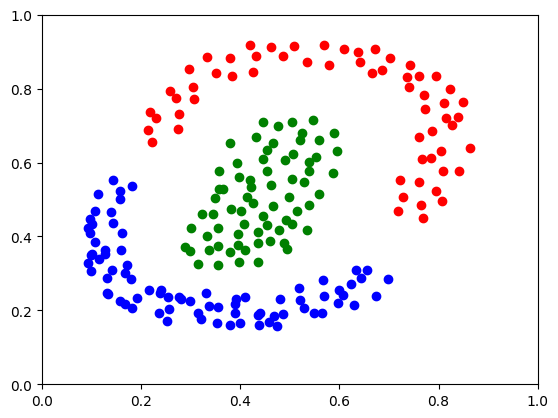

In [59]:
# Dibujar el resultado de la clasificación por el multicapa, comparar con las salidas que debería dar
preds = list(zip(X.tolist(), [p.forward(x).tolist() for x in X]))
preds0 = np.array([point for point, pred in preds if max(pred) == pred[0]])
preds1 = np.array([point for point, pred in preds if max(pred) == pred[1]])
preds2 = np.array([point for point, pred in preds if max(pred) == pred[2]])
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(preds0[:,0],preds0[:,1],'ro')
plt.plot(preds1[:,0],preds1[:,1],'go')
plt.plot(preds2[:,0],preds2[:,1],'bo')


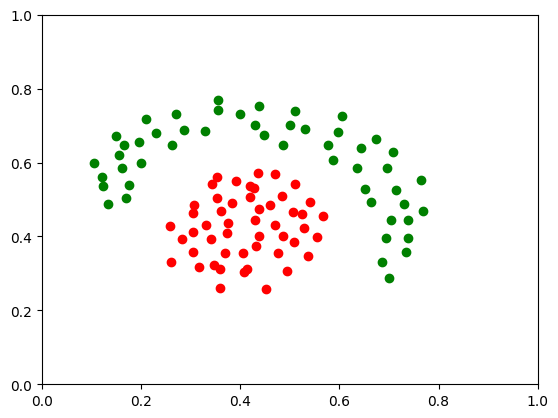

In [3]:
# regiones no lineales # data_2classes_nonlinear_2D
import matplotlib.pyplot as plt

X = np.loadtxt('samples/data_2classes_nonlinear_2D.txt')

d = X[:,-1].astype('int')
X = X[:,:-1]

plt.figure()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot(X[d==0,0],X[d==0,1], 'ro')
plt.plot(X[d==1,0],X[d==1,1], 'go')
plt.show()

no = len(set(d))
ni = X.shape[1]

d = one_hot(d)

In [5]:
# entrenar
# encontrar arquitectura mínima que aprende este problema, para data_2classes_nonlinear_2D.txt y para data_3classes_nonlinear_2D.txt
p = Multilayer(ni,5,no)  # Con 5 neuronas en la capa oculta lo logra resolver
p.train(X, d, 0.1, 1000, 250)
p.info(X, d)


   Epoch: 250
     RMS: 0.27971
Accuracy: 0.79000

   Epoch: 500
     RMS: 0.27166
Accuracy: 0.80500

   Epoch: 750
     RMS: 0.11371
Accuracy: 1.00000

   Epoch: 1000
     RMS: 0.06151
Accuracy: 1.00000
     RMS: 0.06151
Accuracy: 1.00000


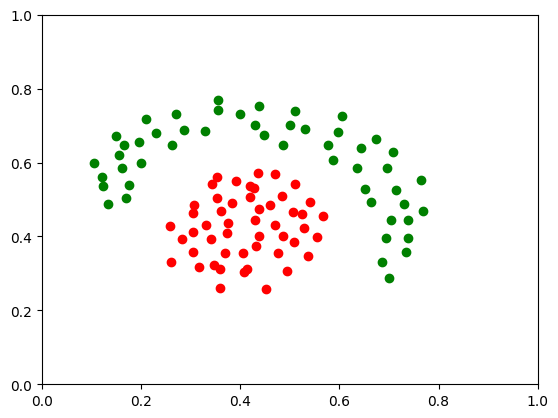

In [6]:
# Dibujar el resultado de la clasificación por el multicapa, comparar con las salidas que debería dar
preds = list(zip(X.tolist(), [p.forward(x).tolist() for x in X]))
preds0 = np.array([point for point, pred in preds if max(pred) == pred[0]])
preds1 = np.array([point for point, pred in preds if max(pred) == pred[1]])
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot(preds0[:,0],preds0[:,1],'ro')
plt.plot(preds1[:,0],preds1[:,1],'go')

In [ ]:
# Orquideas

X = np.loadtxt('samples/iris.csv', dtype = 'float64', usecols = [0,1,2,3])
L = np.loadtxt('samples/iris.csv', dtype = str, usecols = [4]) 

# convierte la salida a enteros
d = []
options = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for e in L:
    d.append(options.index(e))

d = np.array(d)
X = np.array(X)

d = one_hot(d)

ni = X.shape[1]
no = len(options)

# encontrar arquitectura mínima que aprende este problema

p = Multilayer(ni,4,no)  # Con 4 neuronas en la capa oculta es suficiente para que el programa aprenda de forma casi perfecta el problema.
p.train(X,d, 0.02, 2500, 500)  # Obtengo una accuracy de 0.98


   Epoch: 500
     RMS: 0.09060
Accuracy: 0.97556

   Epoch: 1000
     RMS: 0.05981
Accuracy: 0.97778

   Epoch: 1500
     RMS: 0.05015
Accuracy: 0.97778

   Epoch: 2000
     RMS: 0.04474
Accuracy: 0.98444

   Epoch: 2500
     RMS: 0.04114
Accuracy: 0.98667


In [12]:
# multicapa 2 capas

import numpy as np

class Multilayer2:
    def __init__(self, ninput, nhidden1, nhidden2, noutput):
        self.ninput = ninput       
        self.nhidden1 = nhidden1  # num neuronas primera capa oculta
        self.nhidden2 = nhidden2  # num neuronas en la segunda capa oculta
        self.noutput = noutput
        
        # pesos y bias capa oculta 1
        self.w1 = np.random.rand(ninput, nhidden1) - 0.5
        self.b1 = np.random.rand(nhidden1) - 0.5
        
        # psos y bias capa oculta 2
        self.w2 = np.random.rand(nhidden1, nhidden2) - 0.5
        self.b2 = np.random.rand(nhidden2) - 0.5
        
        # pesos y bias capa de salida
        self.w3 = np.random.rand(nhidden2, noutput) - 0.5
        self.b3 = np.random.rand(noutput) - 0.5

    def sig(self, neta):
        return 1.0 / (1.0 + np.exp(-neta))

    def forward(self, x):
        self.s1 = self.sig(x @ self.w1 + self.b1)  # s1
        self.s2 = self.sig(self.s1 @ self.w2 + self.b2)  # s2
        s3 = self.sig(self.s2 @ self.w3 + self.b3)  # s final
        return s3

    def update(self, x, d, alpha):
        self.s1 = self.sig(x @ self.w1 + self.b1) # s1
        self.s2 = self.sig(self.s1 @ self.w2 + self.b2)# s2
        s3 = self.sig(self.s2 @ self.w3 + self.b3) # s3
        
        delta3 = (d - s3) * (1 - s3) * s3  # err salida
        delta2 = (delta3 @ self.w3.T) * (1 - self.s2) * self.s2  # error capa oculta 2
        delta1 = (delta2 @ self.w2.T) * (1 - self.s1) * self.s1  # error capa oculta 1

        # ajuste de pesos y bias
        A3 = alpha * (self.s2.reshape(-1, 1) @ delta3.reshape(1, -1))
        A2 = alpha * (self.s1.reshape(-1, 1) @ delta2.reshape(1, -1))
        A1 = alpha * (x.reshape(-1, 1) @ delta1.reshape(1, -1))
        
        self.w3 += A3
        self.b3 += alpha * delta3
        self.w2 += A2
        self.b2 += alpha * delta2
        self.w1 += A1
        self.b1 += alpha * delta1

    def RMS(self, X, D):
        S = np.array([self.forward(x) for x in X])  
        return np.sqrt(np.mean(np.square(S - D)))  


    def accuracy(self, X, D):
        S = np.array([self.forward(x) for x in X])
        errors = np.mean(np.abs(D - S))
        return 1.0 - errors
    
    def info (self, X, D): # escribe traza
        self.lRMS.append(self.RMS(X,D))
        self.laccuracy.append(self.accuracy(X,D))
        print('     RMS: %6.5f' % self.lRMS[-1])
        print('Accuracy: %6.5f' % self.laccuracy[-1])

    def train(self, X, D, alpha, epochs, trace=0):
        for e in range(1, epochs + 1):
            for i in range(len(X)):
                self.update(X[i], D[i], alpha)
            if trace and e % trace == 0:
                print(f"Epoch {e}, RMS: {self.RMS(X, D):.6f}, Accuracy: {self.accuracy(X, D):.6f}")

    def one_hot (d): # codificación one_hot
        num_classes = len(set(d))
        rows = d.shape[0]
        labels = np.zeros((rows, num_classes), dtype='float32')
        labels[np.arange(rows),d.T] = 1
        return labels



In [13]:
data = np.array([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])  # XOR
labels = np.array([[0.0], [1.0], [1.0], [0.0]]) 
p = Multilayer2(2, 8, 7, 1)
p.train(data, labels, alpha=0.01, epochs=10000, trace=1000)

Epoch 1000, RMS: 0.499957, Accuracy: 0.500049
Epoch 2000, RMS: 0.499954, Accuracy: 0.500052
Epoch 3000, RMS: 0.499951, Accuracy: 0.500055
Epoch 4000, RMS: 0.499948, Accuracy: 0.500059
Epoch 5000, RMS: 0.499945, Accuracy: 0.500062
Epoch 6000, RMS: 0.499942, Accuracy: 0.500065
Epoch 7000, RMS: 0.499938, Accuracy: 0.500069
Epoch 8000, RMS: 0.499935, Accuracy: 0.500073
Epoch 9000, RMS: 0.499931, Accuracy: 0.500077
Epoch 10000, RMS: 0.499927, Accuracy: 0.500081


#### aprobados

In [ ]:
import numpy as np

train_data = np.loadtxt("samples/aprobado-ent.txt")
X_train = train_data[:, :-1]  # entradas: columnas 0 a 2
y_train = train_data[:, -1:]  # salida: columna 3 (0 o 1)

In [18]:
# normalizar datos
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [20]:
# creamos una red neuronal: notas , 5 neuronas en la capa oculta 1, 3 en la capa oculta 2, 1 salida
model = Multilayer2(ninput=3, nhidden1=5, nhidden2=3, noutput=1)

model.train(X_train, y_train, alpha=0.1, epochs=5000, trace=500)


Epoch 500, RMS: 0.042348, Accuracy: 0.971896
Epoch 1000, RMS: 0.024700, Accuracy: 0.984189
Epoch 1500, RMS: 0.018543, Accuracy: 0.988211
Epoch 2000, RMS: 0.015277, Accuracy: 0.990296
Epoch 2500, RMS: 0.013206, Accuracy: 0.991603
Epoch 3000, RMS: 0.011754, Accuracy: 0.992514
Epoch 3500, RMS: 0.010670, Accuracy: 0.993192
Epoch 4000, RMS: 0.009823, Accuracy: 0.993720
Epoch 4500, RMS: 0.009139, Accuracy: 0.994146
Epoch 5000, RMS: 0.008573, Accuracy: 0.994499


In [21]:
test_data = np.loadtxt("samples/aprobado-tst.txt")
X_test = train_data[:, :-1]  
y_test = train_data[:, -1:]

X_test = (X_test - mean) / std

# evaluamos
rms_test = model.RMS(X_test, y_test)
accuracy_test = model.accuracy(X_test, y_test)

print(f"RMS: {rms_test:.6f}")
print(f"acc en test: {accuracy_test:.6f}")


RMS: 0.008573
acc en test: 0.994499


: 

### Explicación de los archivos de datos suministrados

**Nota**: en caso de que se suministre archivo xxx-trn.txt y xxx-tst.txt, se deberá entrenar con el trn y calcular luego el error de test con el tst. Lógicamente queremos un modelo cuyo error de test sea lo más bajo posible. Si no se suministra archivo de test no es necesario dividir en entrenamiento y test, y lo que se busca es el error más bajo en entrenamiento.

#### Aprobados

Contiene 3 entradas, correspondiente a la nota en 3 ejercicios, y 1 salida, que indica si el alumno aprobó o no. Se trataría de predecir si un alumno va a aprobar a partir de sus notas. Es un problema de clasificación.

Cuestiones: ¿Es un problema lineal? ¿Puede aprenderla una red de neuronas?

#### Fun

Contiene 1 entrada y 1 salida, que son la *x* y la *y* de una función desconocida. Es un problema de ajuste o regresión.

Cuestiones: ¿Es una función lineal? ¿Puede aprenderla una red de neuronas? ¿Puede decirnos la red qué función es?

#### Morosos

Contiene datos de morosidad de un banco. La idea es predecir si un nuevo cliente va a devolver un prestamo o no y utilizar esta predicción para concederle o denegarle el préstamo. Es un problema de clasificación.

Tiene 9 entradas y 1 salida.

Cuestiones: ¿Es una función lineal? ¿Cuál es el porcentaje de acierto estimado en test?

#### Quinielas

Contiene datos de quinielas deportivas. Tiene 60 entradas y 3 salidas (1, X, 2). Es un problema de clasificación.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?

#### Sensores

Contiene datos de sensores y velocidades medias en la M-40. La idea es ver si se puede predecir la velocidad media en un punto que no tiene sensor a partir de las lecturas de los sensores en otros puntos. Es un problema de ajuste o regresión.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?

#### Circulo

Es un problema de clasificación con 3 regiones concéntricas. No tiene conjunto de test, el objetivo es encontrar la red mínima que pueda clasificar correctamente todos los ejemplos.

#### Encoder

Es el problema clásico de utilizar una capa oculta para codificar patrones de 8 valores en una dimensión menor. El objetivo es entrenar un perceptrón 8-3-8 para que aprenda esta codificación en el 100% de los ejemplos.  Es un problema de clasificación.

#### Pima-diabetes

Contiene resultados de un conjunto de análisis y pruebas en personas que posteriormente desarrollaron o no diabetes. La idea es ver si se puede predecir si una persona va a desarrollar la enfermedad en el futuro.

En este caso hay que separar aleatoriamente un 30% de ejemplos para tener una conjunto de test. Nota: se sugiere usar la función shuffle.

Cuestiones: ¿Cuál es el porcentaje de acierto estimado en test?

### Introducción a pytorch

Características:
  * Creado por FaceBook en 2017 fusionando las librerías torch y caffe.
  * Es de código abierto.
  * Incluye computación basada en tensores (similar a numpy) y con soporte de GPU, incluidas NVidia, AMD y Apple silicon.
  * Incluye componentes para Redes de Neuronas y Deep Learning, tanto secuenciales como funcionales.

Ventajas frente a tensorflow
 * Mayor comunidad; se adapta más rápido a las nuevas versiones de python.
 * No propietario, fuentes disponibles.
 * Soporte a GPU en AMD y Mac Silicon.
 * La documentación es MUY buena.
 * Es más claro el proceso de enviar y recibir objetos a la GPU.
 * Es más eficiente para el aprendizaje por refuerzo.
 * Ligeramente de más alto nivel que tensorflow, pero por debajo de keras.

Desventajas
  * No es de tan alto nivel como Keras:
    * Requiere la implementación del bucle train.
    * Requiere especificar en más detalle la arquitectura secuencial.
    * Requiere calcular dentro del train las métricas de validación.
    * Requiere mover expresamente los objetos a la GPU.
    * Requiere retropropagar expresamente.
    * Requiere indicar expresamente cuáles son los tensores sobre los que aplicar descenso del gradiente.
 
 Descarga y documentación.  
 https://pytorch.org
 
#### Módulos relacionados

  * torchvision: añade recursos para tratamiento de imágenes, incluyendo modelos preentrenados.
  * torchtext: ídem para lenguaje natural.
  * torchaudio: ídem para audio.

#### Enlaces:

  * Tutorial oficial: https://pytorch.org/tutorials/beginner/basics/intro.html
  * Tutorial en youtube: https://www.youtube.com/watch?v=QetoD5LXlEg
  

### Capas básicas en torch.nn:
  * De procesamiento (layers)
    * Linear
    * Conv2d
    * ConvTranspose2d
    * LSTM
    * GRU
    * Transformer
    * Embeeding
  * De activación
    * Sigmoid
    * Tanh
    * ReLU
    * LeakyReLU
    * Softmax
  * Auxiliares
    * Dropout
    * MaxPool2d
    * BatchNorm2d
    * LocalResponseNorm
    * Flatten

### Modelos secuenciales y funcionales

Igual que en tensorflow tenemos los dos tipos de modelos. La elección depende del tipo de red que estemos construyendo.

#### Modelo secuencial

Las capas se van a aplicar secuencialmente una detrás de otra. Podemos especificar las capas en la propia inicialización del modelo Sequential o añadirlas con add_module.
  
```python
self.layers = nn.Sequential(
            nn.Linear(ni, nh),
            nn.Sigmoid(),
            nn.Linear(nh, no)
        )
```

#### Modelo funcional

Tenemos que hacer explícito cómo se aplican las capas dentro del forward.

```python
import torch.functional as F

class LeNet(torch.nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = torch.nn.Conv2d(1, 6, 5) # in_channels, out_channels, kernel_size,
        self.conv2 = torch.nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = torch.nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x)) # view es similar a resize, aunque en ciertas condiciones reshape puede crear copia del tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
```


#### Manipulación de tensores: view, reshape, squeeze, unsqueeze

  * view: es el método recomendado para cambiar las dimensiones de un tensor.
  * reshape: similar pero puede ser menos eficiente.
  * unsqueeze: inserta una dimensión de tamaño 1 en la posixión que indiquemos. Por ejemplo torch.unsqueeze(input, dim=1) convierte un vector en una matriz columna.
  * squeeze: elimina las dimensiones de longitud 1, o en la dimensión que se indique como argumento.

In [ ]:
%pip install torch # instalación

In [ ]:
import torch
import torch.nn as nn

In [ ]:
import torch

def set_device ():
    if torch.backends.mps.is_available(): # para usar con mac silicon
        device = "mps"
    elif torch.cuda.is_available():
        device = "cuda"
    else:
        device = "cpu"
    torch.set_default_device(device)
    print(f"Using {torch.device(device)} device")
    return torch.device(device)

#### Tarea

Obligatorio

  * Construir un MLP con pytorch para resolver la XOR.
  * Definir la función de trining para entrenarlo.
  * Presentar los resultados.

Opcional
  * Aplicar a los datos suministrados para aproximnar la función seno.
  * Modificar y aplicar a algun otro problema de los suministrados.
  * Modificar la clase basic_MLP para que admita cualquier número de capas. La arquitectura se especificará con una lista [layer1_size, layer2_size, ...]

### obligatorio

In [ ]:
# Define un MLP básico con una sola capa oculta

from torch import nn

# Define model
class basic_MLP (nn.Module):
    def __init__(self, ni, nh, no): # input features, num neuronas capa oculta, output features
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(ni, nh),
            nn.ReLU(),
            nn.Linear(nh, no),
            nn.Sigmoid()  ) #para la salida

    def forward(self, x):
        output = self.layers(x)
        return output

In [ ]:
# Datos XOR
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)


In [ ]:
from torch.optim import Adam

In [ ]:
model = basic_MLP(2, 15, 1)  # entrada: 2, ocultas: 12, out: 1
loss_fn = nn.BCELoss()  # Binary Cross Entropy Loss clasific bin
optimizer = Adam(model.parameters(), lr=0.01)

In [ ]:
# Función de entrenamiento
def training(X, Y, model, loss_fn, optimizer, epochs=1000, trace=100):
    for epoch in range(epochs):
        optimizer.zero_grad()
        predictions = model(X)  #forward prop
        loss = loss_fn(predictions, Y)  #perdida
        loss.backward()  #back prop
        optimizer.step()  #actualizar paramentros

        if (epoch + 1) % trace == 0:
            print(f"epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")

In [ ]:
training(X, Y, model, loss_fn, optimizer, epochs=8000)

epoch 100/8000, Loss: 0.194560
epoch 200/8000, Loss: 0.033463
epoch 300/8000, Loss: 0.012746
epoch 400/8000, Loss: 0.006760
epoch 500/8000, Loss: 0.004207
epoch 600/8000, Loss: 0.002876
epoch 700/8000, Loss: 0.002093
epoch 800/8000, Loss: 0.001591
epoch 900/8000, Loss: 0.001249
epoch 1000/8000, Loss: 0.001006
epoch 1100/8000, Loss: 0.000826
epoch 1200/8000, Loss: 0.000690
epoch 1300/8000, Loss: 0.000584
epoch 1400/8000, Loss: 0.000500
epoch 1500/8000, Loss: 0.000432
epoch 1600/8000, Loss: 0.000376
epoch 1700/8000, Loss: 0.000330
epoch 1800/8000, Loss: 0.000292
epoch 1900/8000, Loss: 0.000259
epoch 2000/8000, Loss: 0.000231
epoch 2100/8000, Loss: 0.000207
epoch 2200/8000, Loss: 0.000187
epoch 2300/8000, Loss: 0.000169
epoch 2400/8000, Loss: 0.000153
epoch 2500/8000, Loss: 0.000139
epoch 2600/8000, Loss: 0.000127
epoch 2700/8000, Loss: 0.000116
epoch 2800/8000, Loss: 0.000106
epoch 2900/8000, Loss: 0.000097
epoch 3000/8000, Loss: 0.000089
epoch 3100/8000, Loss: 0.000082
epoch 3200/8000, 

In [ ]:
with torch.no_grad():
    predictions = model(X)
    print("predicciones XOR:\n", predictions) # es aprox [0, 1, 1, 0] (valor esperado)

predicciones XOR:
 tensor([[3.6906e-08],
        [1.0000e+00],
        [1.0000e+00],
        [2.6501e-08]])


### opcional

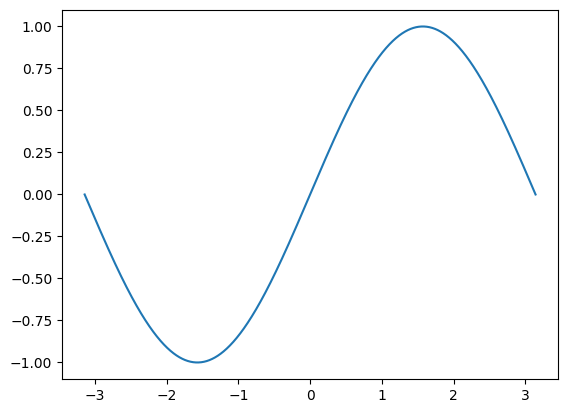

In [ ]:
# Ejemplo, crea datos para y = sin(x)

import math
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-math.pi, math.pi, 2000, dtype=np.float32)
y = np.sin(x, dtype=np.float32)

plt.plot(x,y)
plt.show()

In [ ]:
# convertir tensores numpy a pytorch: torch.from_numpy()
# convertir datos torch a numpy: X.cpu().numpy()
# enviar datos a la GPU: X.to(device)

device = set_device()

X = torch.from_numpy(x) # convierte a torch
Y = torch.from_numpy(y)

print(Y)
print(Y.device)

Y = Y.to(device) # envía a GPU
print(Y.device)

Using cpu device
tensor([ 8.7423e-08, -3.1432e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])
cpu
cpu


In [ ]:
def train (X, Y, model, loss_fn, optimizer, epochs=1000, device='cpu', trace=100): # train sin batches
    size = len(X)
    model = model.to(device)
    model.train() # indica que vamos a entrenar
    # Xg, Yg = X.to(device), Y.to(device)

    Xg = X.unsqueeze(1).to(device)  # Agregar una dimensión a X
    Yg = Y.unsqueeze(1).to(device)  # Agregar una dimensión a Y


    for e in range(epochs): # bucle de entrenamiento
        optimizer.zero_grad() # reset gradients

        pred = model(Xg) # propagate
        loss = loss_fn(pred, Yg) # prediction error

        loss.backward() # back propagation
        optimizer.step() # update parameters

        if (e+1) % trace == 0: # traces
            loss, current = loss.item(), e+1
            print(f"loss: {loss:>7f}  [{current:>5d} /{epochs:>5d}]")

In [ ]:
# modelo para aprender la función seno

model = basic_MLP(1, 500, 1)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

train(X, Y, model, loss_fn, optimizer, 1000, device= device , trace=100)

loss: 0.268697  [  100 / 1000]
loss: 0.255957  [  200 / 1000]
loss: 0.252568  [  300 / 1000]
loss: 0.251496  [  400 / 1000]
loss: 0.251105  [  500 / 1000]
loss: 0.250930  [  600 / 1000]
loss: 0.250829  [  700 / 1000]
loss: 0.250754  [  800 / 1000]
loss: 0.250691  [  900 / 1000]
loss: 0.250635  [ 1000 / 1000]


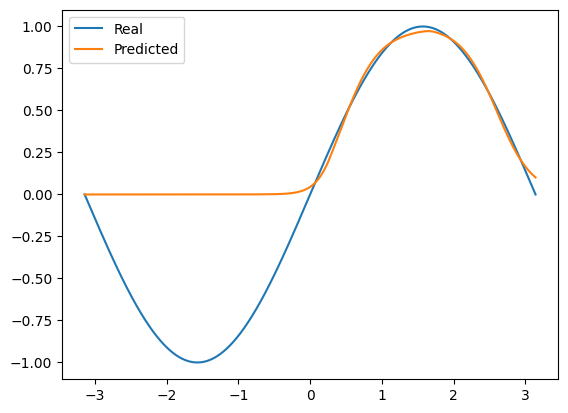

In [ ]:
model.eval()  # modo evaluación
with torch.no_grad():
    predictions = model(X.unsqueeze(1)).squeeze()

plt.plot(x, y, label="Real")
plt.plot(x, predictions.numpy(), label="Predicted")
plt.legend()
plt.show()


como vemos que la función de pérdidda no baja apenas por cada 100 periodos vamos a modificar la funcion `basic_MLP` para que se ajuste al rango -1, 1

In [ ]:
class basic_MLP(nn.Module):
    def __init__(self, ni, nh, no):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(ni, nh),
            nn.Tanh(),          # Activación Tanh
            nn.Linear(nh, nh),

        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
# convertir tensores numpy a pytorch: torch.from_numpy()
# convertir datos torch a numpy: X.cpu().numpy()
# enviar datos a la GPU: X.to(device)

device = set_device()

X = torch.from_numpy(x) # convierte a torch
Y = torch.from_numpy(y)

print(Y)
print(Y.device)

Y = Y.to(device) # envía a GPU
print(Y.device)

Using cpu device
tensor([ 8.7423e-08, -3.1432e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])
cpu
cpu


In [ ]:
def train (X, Y, model, loss_fn, optimizer, epochs=1000, device='cpu', trace=100): # train sin batches
    size = len(X)
    model = model.to(device)
    model.train() # indica que vamos a entrenar
    # Xg, Yg = X.to(device), Y.to(device)

    Xg = X.unsqueeze(1).to(device)  # Agregar una dimensión a X
    Yg = Y.unsqueeze(1).to(device)  # Agregar una dimensión a Y


    for e in range(epochs): # bucle de entrenamiento
        optimizer.zero_grad() # reset gradients

        pred = model(Xg) # propagate
        loss = loss_fn(pred, Yg) # prediction error

        loss.backward() # back propagation
        optimizer.step() # update parameters

        if (e+1) % trace == 0: # traces
            loss, current = loss.item(), e+1
            print(f"loss: {loss:>7f}  [{current:>5d} /{epochs:>5d}]")

In [ ]:
# modelo para aprender la función seno

model = basic_MLP(1, 500, 1)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

train(X, Y, model, loss_fn, optimizer, 1000, device= device , trace=100)

loss: 0.012829  [  100 / 1000]
loss: 0.002588  [  200 / 1000]
loss: 0.000836  [  300 / 1000]
loss: 0.000379  [  400 / 1000]
loss: 0.000184  [  500 / 1000]
loss: 0.000095  [  600 / 1000]
loss: 0.000054  [  700 / 1000]
loss: 0.000033  [  800 / 1000]
loss: 0.000022  [  900 / 1000]
loss: 0.000015  [ 1000 / 1000]


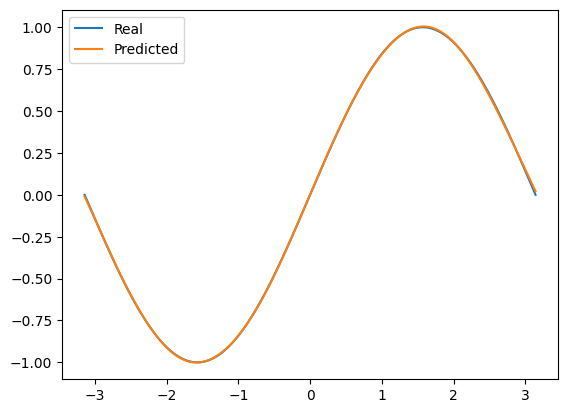

In [ ]:
model.eval()  # modo evaluación
with torch.no_grad():
    predictions = model(X.unsqueeze(1)).squeeze()

plt.plot(x, y, label="Real")
plt.plot(x, predictions.numpy(), label="Predicted")
plt.legend()
plt.show()


la predicción se ajusta sorprendentemente bien. No obstante, el tiempo de ejecuciñon es muy elevado. Vamos a probar otro tipo de modificaciones como desactivar la capa de salida par que esta sea continua

In [ ]:
class basic_MLP(nn.Module):
    def __init__(self, ni, nh, no):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(ni, nh),
            nn.Tanh(),
            nn.Linear(nh, no)  # sin activacion para salida continua
        )

    def forward(self, x):
        return self.layers(x)


In [ ]:
x = np.linspace(-np.pi, np.pi, 2000, dtype=np.float32)
y = np.sin(x, dtype=np.float32)

x = (x - x.min()) / (x.max() - x.min()) * 2 - 1
y = (y - y.min()) / (y.max() - y.min()) * 2 - 1  # escalar entre -1 y 1


device = set_device()

X = torch.from_numpy(x) # convierte a torch
Y = torch.from_numpy(y)

print(Y)
print(Y.device)

Y = Y.to(device) # envía a GPU
print(Y.device)

Using cpu device
tensor([ 1.1921e-07, -3.1432e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1433e-03, -5.9605e-08])
cpu
cpu


In [ ]:
model = basic_MLP(1, 500, 1)

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

train(X, Y, model, loss_fn, optimizer, 1000, device= device , trace=100)

loss: 0.175866  [  100 / 1000]
loss: 0.144126  [  200 / 1000]
loss: 0.089048  [  300 / 1000]
loss: 0.028343  [  400 / 1000]
loss: 0.002842  [  500 / 1000]
loss: 0.000123  [  600 / 1000]
loss: 0.000035  [  700 / 1000]
loss: 0.000029  [  800 / 1000]
loss: 0.000048  [  900 / 1000]
loss: 0.000040  [ 1000 / 1000]


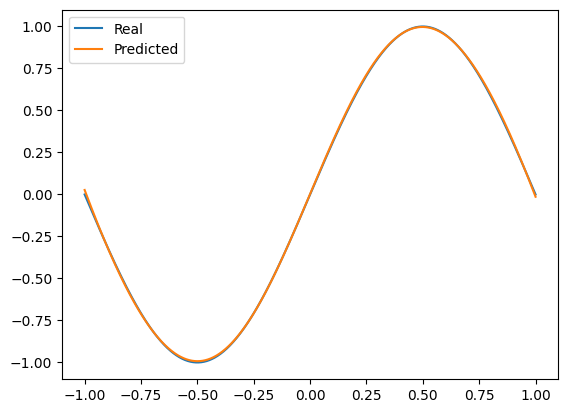

In [ ]:
model.eval()  # modo evaluación
with torch.no_grad():
    predictions = model(X.unsqueeze(1)).squeeze()

plt.plot(x, y, label="Real")
plt.plot(x, predictions.numpy(), label="Predicted")
plt.legend()
plt.show()

vameos que practicamente se solapan tanto la prediccion como el real.

modificación función `basic_MLP`

In [ ]:
class basic_MLP_modified(nn.Module):
    def __init__(self, layer_sizes):
        super().__init__()
        layers = []
        for i in range(len(layer_sizes) - 1):
            layers.append(nn.Linear(layer_sizes[i], layer_sizes[i + 1]))
            if i < len(layer_sizes) - 2:  #solo entre capas ocultas
                layers.append(nn.ReLU())
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)


In [ ]:
def train_modified(X, Y, model, loss_fn, optimizer, epochs=1000, trace=100):
    for epoch in range(epochs):
        optimizer.zero_grad()
        predictions = torch.sigmoid(model(X))   #forward prop
        loss = loss_fn(predictions, Y)  #perdida
        loss.backward()  #back prop
        optimizer.step()  #actualizar paramentros

        if (epoch + 1) % trace == 0:
            print(f"epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")

In [ ]:
# Datos XOR
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

model = basic_MLP_modified([2, 12, 15, 1])

# Definir función de pérdida y optimizador
loss_fn = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = Adam(model.parameters(), lr=0.01)

In [ ]:
train_modified(X, Y, model, loss_fn, optimizer)

epoch 100/1000, Loss: 0.002756
epoch 200/1000, Loss: 0.000802
epoch 300/1000, Loss: 0.000387
epoch 400/1000, Loss: 0.000228
epoch 500/1000, Loss: 0.000150
epoch 600/1000, Loss: 0.000106
epoch 700/1000, Loss: 0.000079
epoch 800/1000, Loss: 0.000061
epoch 900/1000, Loss: 0.000048
epoch 1000/1000, Loss: 0.000039


In [ ]:
with torch.no_grad():
    predictions = torch.sigmoid(model(X))  # Aplicar Sigmoid a la salida
    print(predictions) # casi 1 los valores cntrales y un número muy equeño (cercao a 0) en los extremos -> aprox [0, 1, 1, 0]

tensor([[4.2780e-05],
        [9.9996e-01],
        [9.9996e-01],
        [3.9738e-05]])
